# Sales Forecasting Project
***

_**Importing the required libraries & packages**_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command**_

In [2]:
df = pd.read_csv('Train.csv')

## Exploratory Data Analysis (EDA) 

_**Getting all the unique value counts from all the columns using <span style = 'background : green'> <span style = 'color : white'>  lambda   </span></span> function**_

In [3]:
df.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

_**Checking the dataset whether it's having duplicate values or not**_

In [4]:
df.duplicated().sum()

0

_**Checking for the null values of all the columns from the dataset**_

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

_**Getting the Data types and Non-null count of all the columns from the dataset using <span style = 'background : green'><span style = 'color : white'> .info() </span> </span> statement**_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

_**Getting all the columns with "object" data type from the dataset and appending it to the list**_

In [7]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
display(cat_col)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

_**Removing the columns `Item_Identifier` and `Outlet_Identifier` from the list since the both columns doesn't need any cleaning**_ 

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

_**Displaying the list after removing certain columns from it to verify**_

In [9]:
display(cat_col)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

_**Getting the unique value counts of the columns in the list**_

In [10]:
for col in cat_col:
    print(col,len(df[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


_**Checking the value counts of the columns from the list and displaying it column wise**_

In [11]:
for col in cat_col:
    print(col)
    print(df[col].value_counts(),'\n')
    print('-'*55)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

-------------------------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

-------------------------------------------------------
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

-------------------------------------------------------
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Loca

_**Getting the null values from the `Item_Weight` column for the null value treatment process and displaying the Dataset with null values in the `Item_Weight` column**_

In [12]:
miss_bool = df['Item_Weight'].isnull()
Item_Weight_Null = df[df['Item_Weight'].isnull()]
display(Item_Weight_Null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,House Hold Things,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,House Hold Things,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,House Hold Things,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Groceries,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Groceries,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,House Hold Things,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,House Hold Things,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,House Hold Things,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Groceries,487.3656


_**Getting the mean values of the `Item_Weight` with respect to `Item_Identifier` column of the dataset using <span style = 'background : green'><span style = 'color : white'> Pivot Table </span> </span> function**_

In [13]:
Item_Weight_Mean = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
display(Item_Weight_Mean)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


_**Treating the missing values of the `Item_Weight` column with the mean values we got above using <span style = 'background : green'><span style = 'color : white'> Pivot Table </span> </span> function and filling it out with respect to `Item_Identifier` column**_

In [14]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in Item_Weight_Mean.index:
            df.loc[i, 'Item_Weight'] = Item_Weight_Mean.loc[item]['Item_Weight']
        else:
            df.loc[i, 'Item_Weight'] = df['Item_Weight'].mean()


_**After treating the null values in the `Item_Weight` column, checking for the null value in the column**_

In [15]:
df['Item_Weight'].isna().sum()

0

_**Getting the unique value counts from `Outlet_Size` column from the dataset**_

In [16]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

_**Checking out for the null value counts from the `Outlet_Size` column from the dataset**_

In [17]:
df['Outlet_Size'].isnull().sum()

2410

_**Getting the null values from the `Outlet_Size` column for the null value treatment process and displaying the Dataset with null values in the `Outlet_Size` column**_

In [18]:
Outlet_Size_Null = df[df['Outlet_Size'].isna()]
display(Outlet_Size_Null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Groceries,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Beauty products,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Beauty products,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Beauty products,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Groceries,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Beauty products,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Groceries,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Groceries,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Groceries,468.7232


_**Getting the value counts of `Outlet_Type` from the `Outlet_Size` null dataset**_

In [19]:
Outlet_Size_Null['Outlet_Type'].value_counts()

Groceries            1065
Beauty products       772
House Hold Things     292
Snaks                 281
Name: Outlet_Type, dtype: int64

_**Grouping by `Outlet_Type` and `Outlet_Size` with the aggregate function of size of the `Outlet_Type` column values**_

In [20]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Beauty products   High                403
                  Medium              391
                  Small               811
Groceries         High                250
                  Medium              249
                  Small              1019
House Hold Things High                137
                  Medium             1096
                  Small               310
Snaks             High                142
                  Medium             1057
                  Small               248

_**Getting the mode values of the `Outlet_Size` with respect to `Outlet_Type` column of the dataset using <span style = 'background : green'><span style = 'color : white'> Pivot Table </span> </span> function**_ 

In [21]:
Outlet_Size_Mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x : x.mode()[0]))
display(Outlet_Size_Mode)

Outlet_Type,Beauty products,Groceries,House Hold Things,Snaks
Outlet_Size,Small,Small,Medium,Medium


_**Getting the null values of `Outlet_Size` column from the dataset and treating the null value using mode values of the `Outlet_Size` with respect to `Outlet_Type` column**_

In [22]:
miss_bool = df['Outlet_Size'].isna()
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x : Outlet_Size_Mode[x])

_**After missing value treatment of the `Outlet_Size` column, checking for the null values in the column**_

In [23]:
df['Outlet_Size'].isna().sum()

0

_**Checking for the null values of all the columns from the dataset after missing value treatment**_

In [24]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

_**Getting the count of `Item_Visibility` column with value 0**_

In [25]:
sum(df['Item_Visibility'] == 0)

526

_**Filling out the 0 values from the `Item_Visibility` column with mean values using <span style = 'background : green'><span style = 'color : white'> replace </span> </span> function**_ 

In [26]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace = True)

_**Now, again checking out for 0 values in the `Item_Visibility` column after filling it out to verify any misplacement happened**_

In [27]:
sum(df['Item_Visibility'] == 0)

0

_**Getting the unique value counts from the `Item_Fat_Content` column**_

In [28]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

_**After seeing the unique value counts from the `Item_Fat_Content` column, there have been some mistyping occured like the same categories were typed under different names. For further processing, all the mistypings are corrected and named under a single category. Checking out for the value counts of `Item_Fat_Content` column**_

In [29]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

_**Adding new column `New_Item_Type` to the dataset by getting the first two characters from the `Item_Identifier` column which represents the category of the item and getting the value counts of the `New_Item_Type` column**_

In [30]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x : x[:2])
df['New_Item_Type'].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

_**As the `New_Item_Type` column has values which is subjected to categories for better understanding, replacing the codes with meaningful categorical item name and getting the value counts of `New_Item_Type` column**_

In [31]:
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD' : 'Food', 'NC' : 'Non-Consumables', 'DR' : 'Drinks'})
df['New_Item_Type'].value_counts()

Food               6125
Non-Consumables    1599
Drinks              799
Name: New_Item_Type, dtype: int64

_**Grouping by `New_Item_Type` and `Item_Fat_Content` with the aggregate function of size of the `Outlet_Type` column values**_

In [32]:
df.groupby(['New_Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                        size
New_Item_Type   Item_Fat_Content            
Drinks          Low Fat                  728
                Regular                   71
Food            Low Fat                 3190
                Regular                 2935
Non-Consumables Low Fat                 1599

_**From the above output its clear that Non-Consumable type from `New_Item_Type` column is mapped to Low Fat category in `Item_Fat_Content` column. So marking it as Non-Edible in `Item_Fat_Content` column**_

In [33]:
df.loc[df['New_Item_Type'] == 'Non-Consumables','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

_**Getting all the unique value from `Outlet_Establishment_Year` column from the dataset**_

In [34]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

## Data Visualization

_**Plotting the Bar Graph with count of `Item_Fat_Content`  and confirm that there are no null values and identify all unique values from the `Item_Fat_Content` and saving the PNG File**_

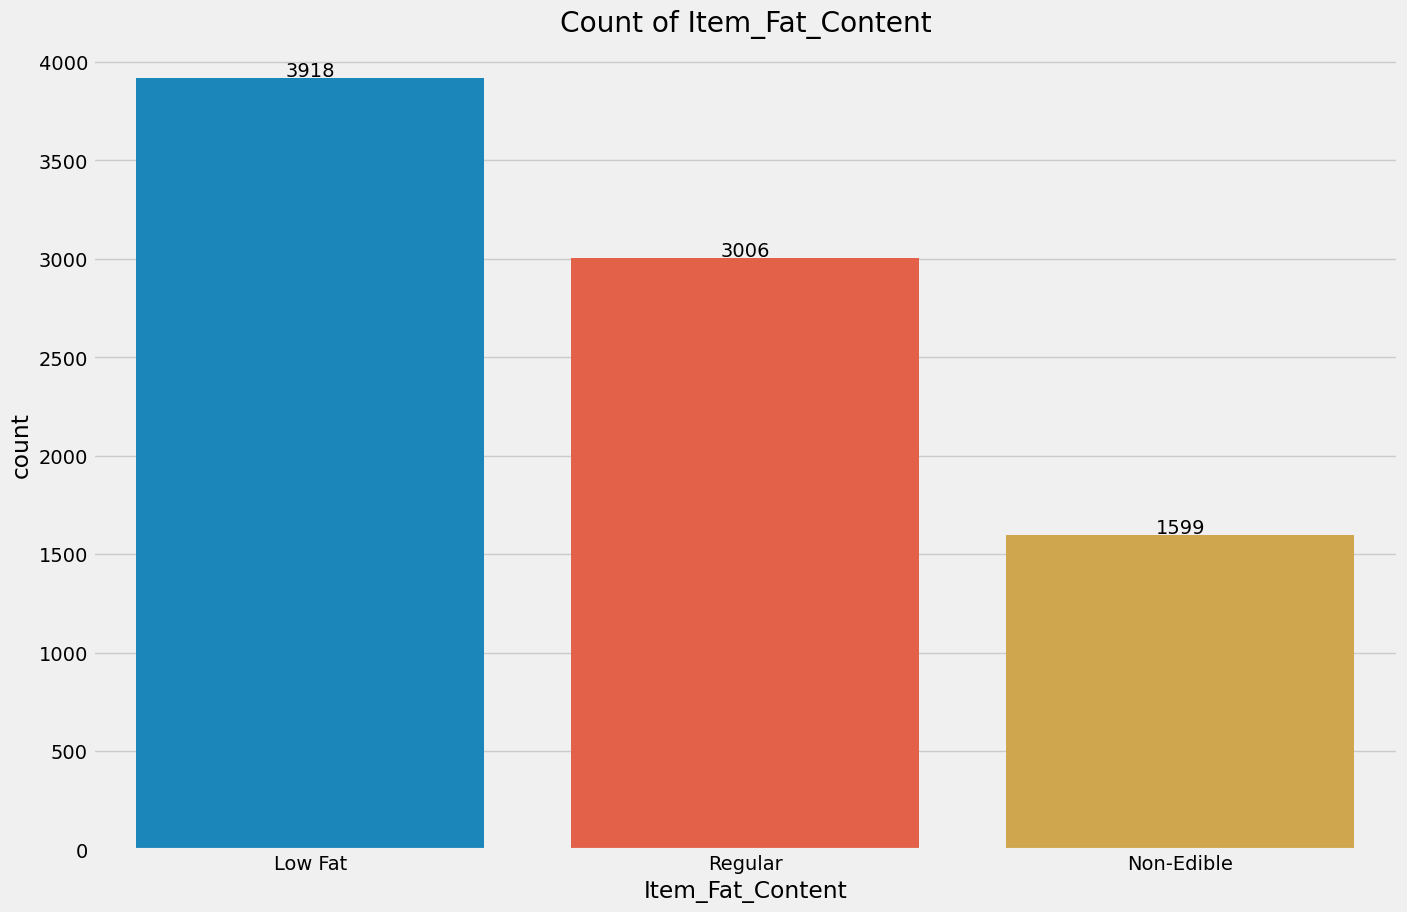

In [35]:
plt.rcParams['figure.figsize'] = 15,10
plt.style.use('fivethirtyeight')
plot = sns.countplot(x = df['Item_Fat_Content'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Item_Fat_Content')
plt.savefig('Count of Item_Fat_Content.png')
plt.show()

_**Plotting the Bar Graph with count of `Item_Type`  and confirm that there are no null values and identify all unique values from the `Item_Type` and saving the PNG File**_

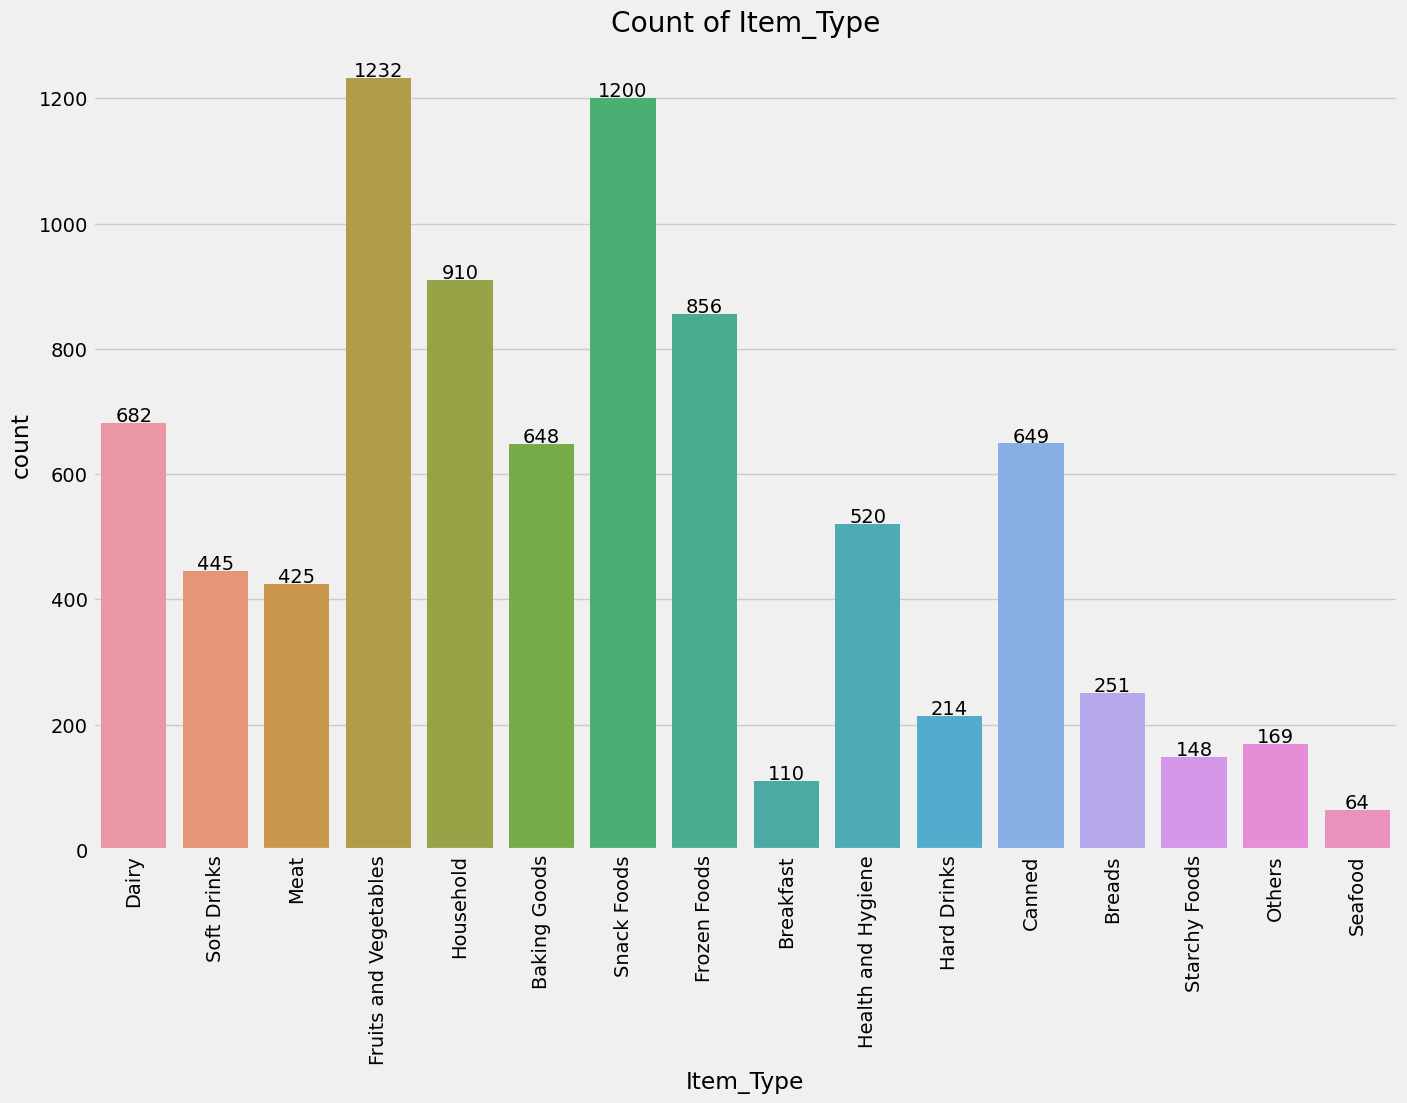

In [36]:
plot = sns.countplot(x = df['Item_Type'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.title('Count of Item_Type')
plt.savefig('Count of Item_Type.png')
plt.show()



_**Plotting the Bar Graph with count of `Outlet_Location_Type`  and confirm that there are no null values and identify all unique values from the `Outlet_Location_Type` and saving the PNG File**_

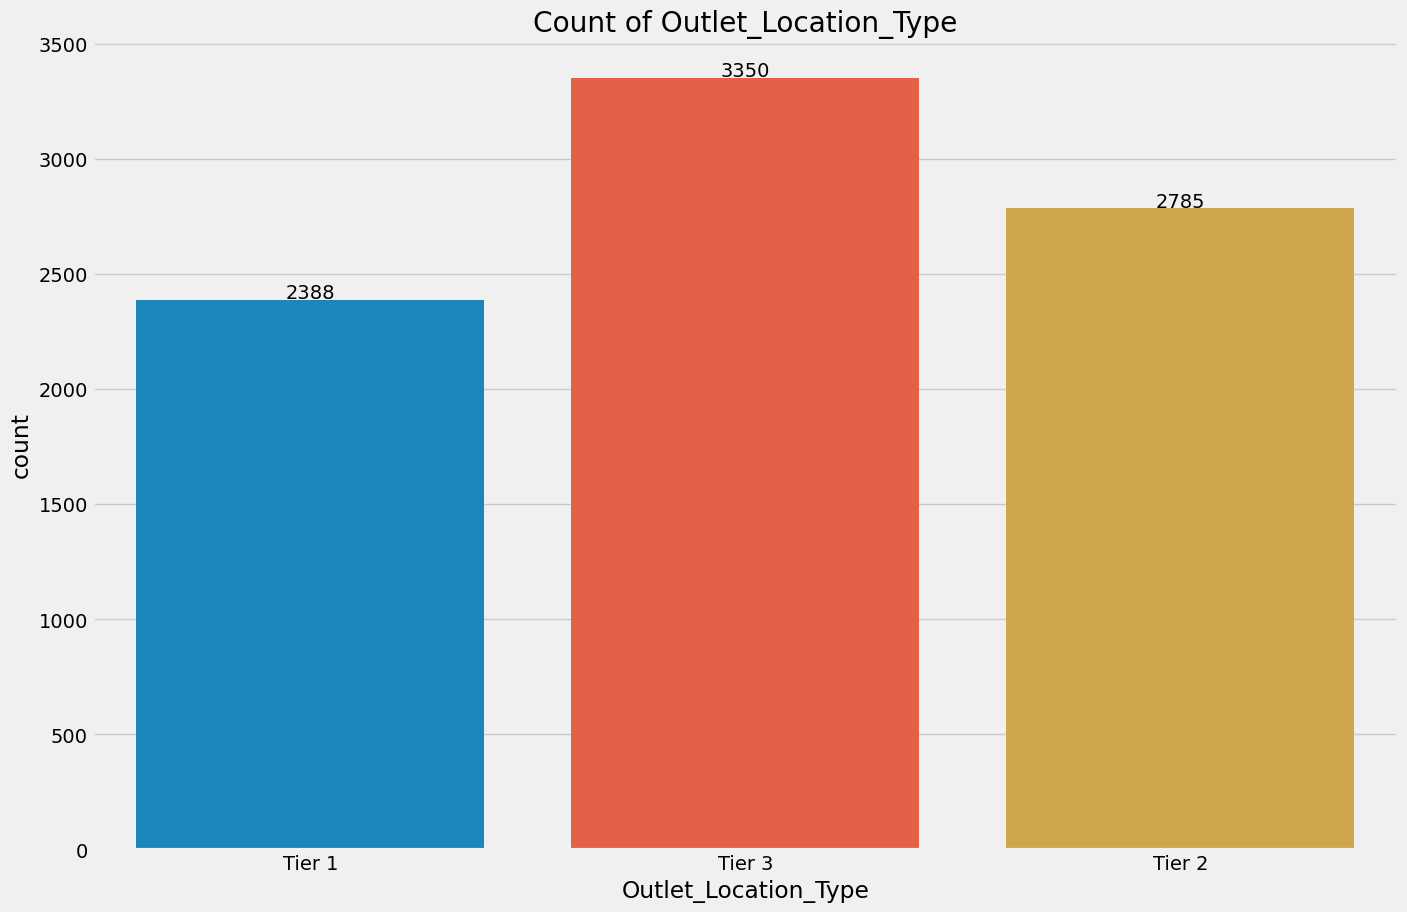

In [37]:
plot = sns.countplot(x = df['Outlet_Location_Type'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Location_Type')
plt.savefig('Count of Outlet_Location_Type.png')
plt.show()

_**Plotting the Bar Graph with count of `Outlet_Size`  and confirm that there are no null values and identify all unique values from the `Outlet_Size` and saving the PNG File**_

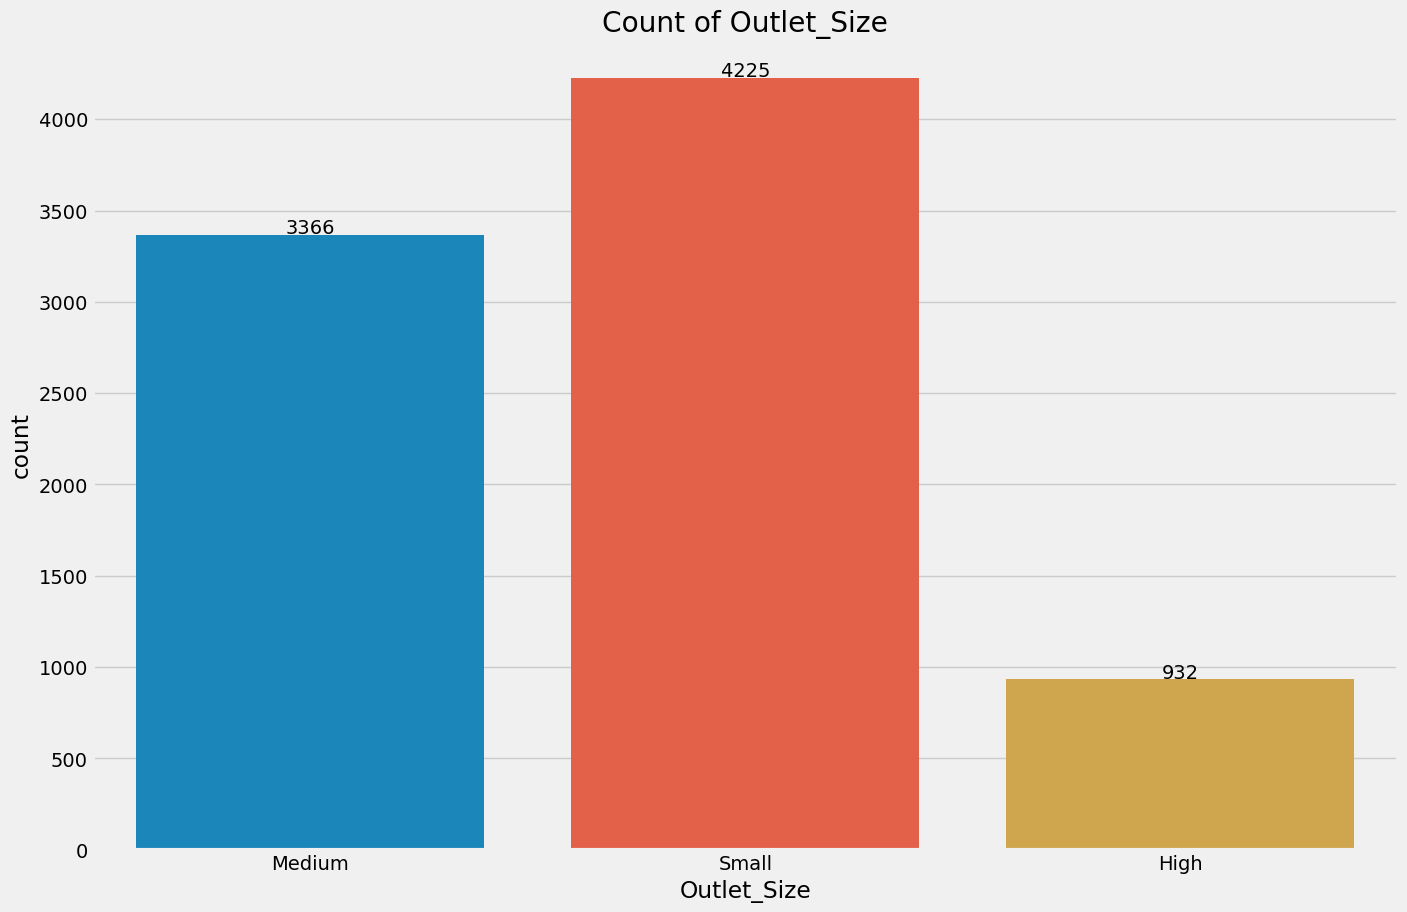

In [38]:
plot = sns.countplot(x = df['Outlet_Size'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Size')
plt.savefig('Count of Outlet_Size.png')
plt.show()

_**Plotting the Bar Graph with count of `Outlet_Type`  and confirm that there are no null values and identify all unique values from the `Outlet_Type` and saving the PNG File**_

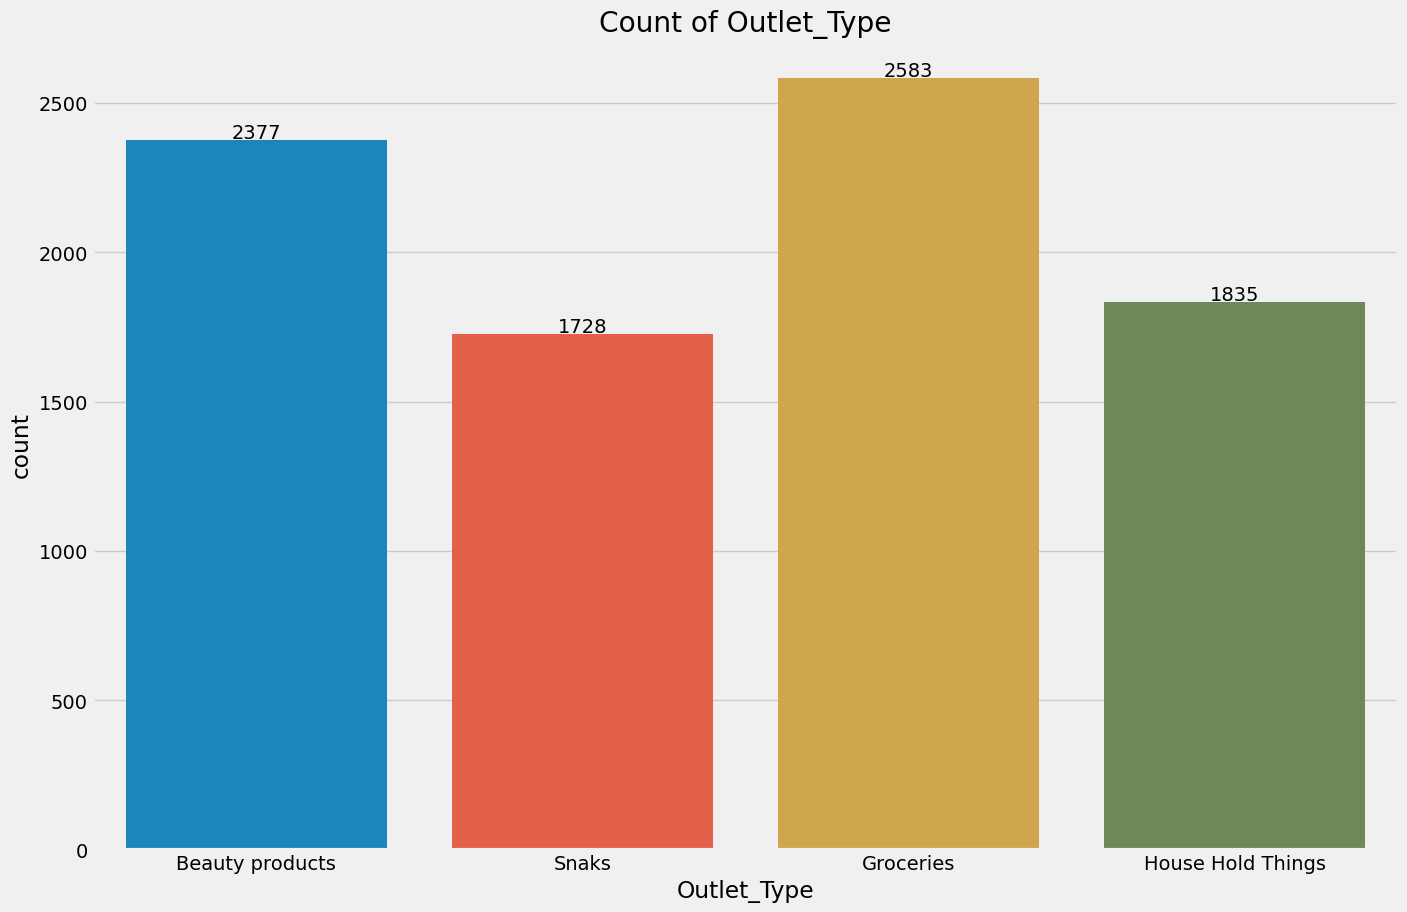

In [39]:
plot = sns.countplot(x = df['Outlet_Type'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Type')
plt.savefig('Count of Outlet_Type.png')
plt.show()